In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import random 

In [3]:
df = pd.read_csv('./homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [8]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis = 'columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [10]:
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

## <font color = "orange">Batch</font> Gradient Descent

In [26]:
def batch_gradient_descent(X ,y_true ,epochs ,learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = number_of_features)
    b = 0
    loss_list = []
    epoch_list = []
    total_samples = X.shape[0]
    for i in range(epochs):
        y_predicted = np.dot(w ,scaled_X.T) + b ## w1x1 +w2x2 + bias
        w_grad = (-2/total_samples)*(X.T.dot(y_true - y_predicted))
        b_grad = (-2/total_samples)*(np.sum(y_true - y_predicted))
        
        w = w - (learning_rate * w_grad)
        b = b - (learning_rate * b_grad)
        
        loss = np.mean(np.square(y_true - y_predicted))
        if i%10 == 0:
            loss_list.append(loss)
            epoch_list.append(i)
            
    return w ,b ,loss ,loss_list ,epoch_list

In [28]:
 w ,b ,loss ,loss_list ,epoch_list = batch_gradient_descent(scaled_X ,scaled_Y.reshape(scaled_Y.shape[0],) ,500)

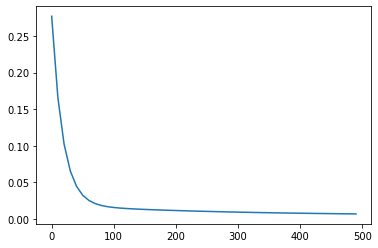

In [30]:
plt.plot(epoch_list ,loss_list)

In [35]:
def prediction_function(area ,bedroom ,w, b):
    scaled_X = sx.transform([[area,bedroom]])[0]
    scaled_price = w[0]*scaled_X[0] +w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])

In [38]:
prediction_function(1056, 2 ,w,b)

array([[32.09649526]])

## <font color = "purple">Stochastic</font> Gradient Descent

In [45]:
def stochastic_gradient_descent(X ,y_true ,epochs ,learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    loss_list = []
    epoch_list = []
    for i in range(epochs):
        random_index = random.randint(0 ,total_samples - 1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w ,sample_x.T) + b ## w1x1 +w2x2 + bias
        w_grad = (-2/total_samples)*(sample_x.T.dot(sample_y - y_predicted))
        b_grad = (-2/total_samples)*(np.sum(sample_y - y_predicted))
        
        w = w - (learning_rate * w_grad)
        b = b - (learning_rate * b_grad)
        
        loss = np.mean(np.square(sample_y - y_predicted))
        if i%10 == 0:
            loss_list.append(loss)
            epoch_list.append(i)
            
    return w ,b ,loss_list ,epoch_list

In [84]:
w_sgd ,b_sgd ,loss_list_sgd ,epoch_list_sgd = stochastic_gradient_descent(scaled_X ,scaled_Y.reshape(scaled_Y.shape[0],),10000)

In [85]:
w_sgd ,b_sgd

(array([0.70968815, 0.67569151]), -0.23485408907654168)

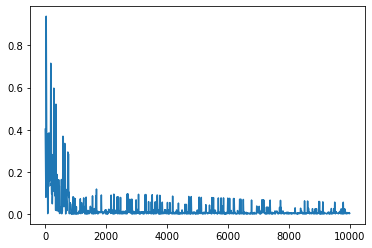

In [86]:
plt.plot(epoch_list_sgd ,loss_list_sgd)

In [60]:
prediction_function(2600 ,4 ,w_sgd ,b_sgd)

array([[121.85512665]])

## <font color = "brown">Mini Batch</font>Gradient Descent

In [68]:
def mini_batch_gradient_descent(X ,y_true ,epochs ,batch_size  ,learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_number_of_samples = X.shape[0]
    if batch_size > total_number_of_samples:
        batch_size = total_number_of_samples
    loss_list = []
    epoch_list = []
    num_batches = int(total_number_of_samples/batch_size)
    for i in range(epochs):
        random_indices = np.random.permutation(total_number_of_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        for j in range(0,total_number_of_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            loss = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            loss_list.append(loss)
            epoch_list.append(i)
    return w, b, loss, loss_list, epoch_list
        

In [75]:
w_mb ,b_mb ,loss_mb ,loss_list_mb ,epoch_list_mb = mini_batch_gradient_descent(scaled_X ,scaled_Y.reshape(scaled_Y.shape[0],),1000 ,5)

In [76]:
w_mb ,b_mb

(array([0.73003881, 0.4484862 ]), -0.12342964945964911)

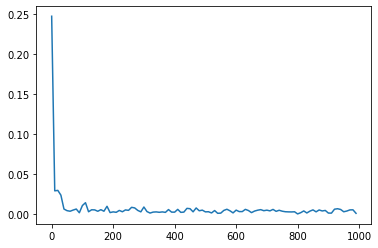

In [77]:
plt.plot(epoch_list_mb ,loss_list_mb)